# Analyzing Crime in Los Angeles

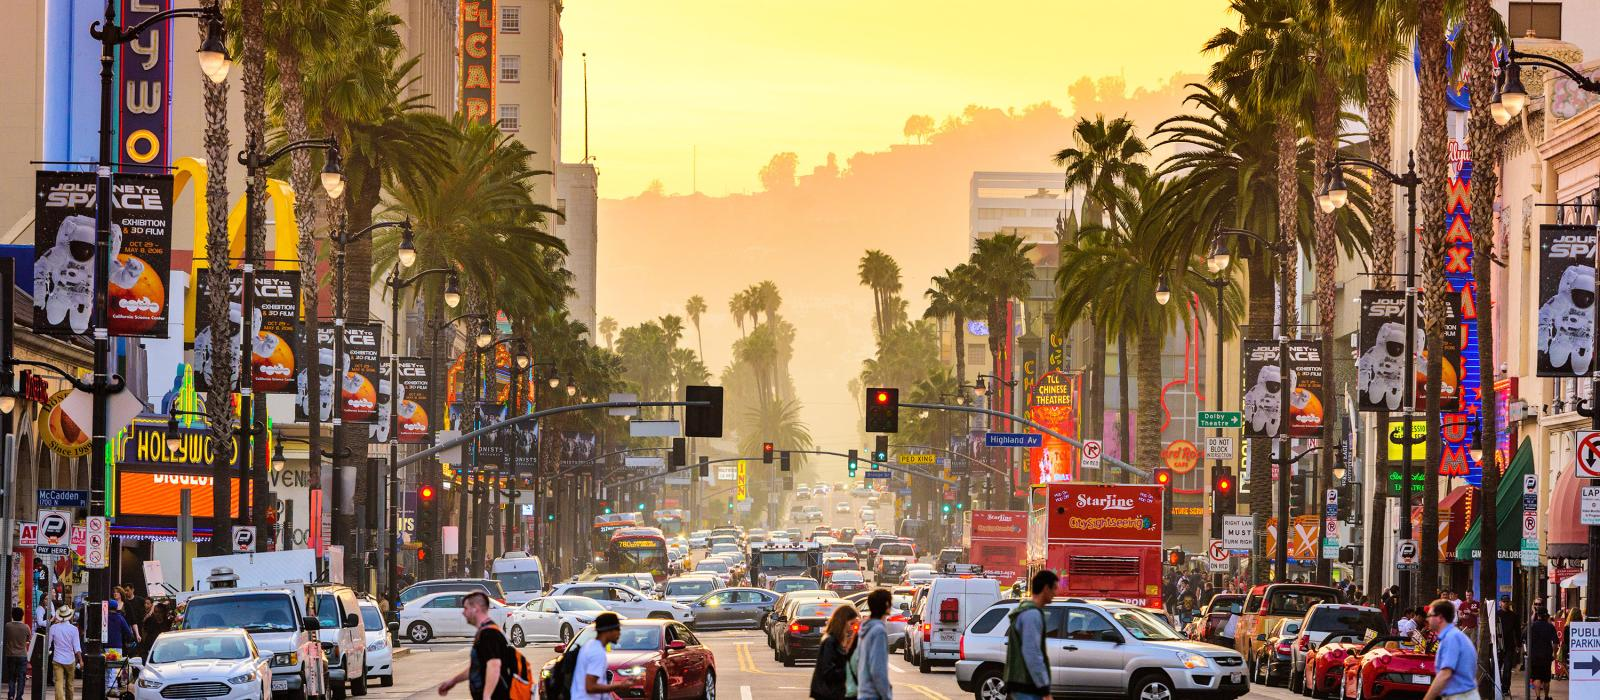

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime.

I have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use my insights to allocate resources effectively to tackle various crimes in different areas.

In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
pd.set_option("display.max_columns", None)
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import math
import folium
from geopy.geocoders import Nominatim
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from wordcloud import WordCloud,STOPWORDS
import missingno as msno

Insights from this analysis can point out the most prevalent problems and the most vulnerable groups needing protection.

Here is the outline of my analysis:

- The Dataset: Load, clean, and convert to appropriate formats.
- Exploratory Data Analysis: 
Visualize and infer meaningful insights from the data by answering the following topics:
    ###### - Most problematic crimes: What are the main crimes?
    ###### - Temporal trends in criminal activities: When do crime occur?
    ###### - Crime Location: Where do crimes happen?
    ###### - Victim's Characteristics: Who are the most vulnerable victims?

In [2]:
# loading data
df = pd.read_csv("D:/practice/datacamp/Crime_Data_from_2020_to_Present.csv")
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [3]:
print("There are  total {} rows in dataset." .format(df.shape[0]))
print("-" *47)
print("There are total {} columns in dataset." .format(df.shape[1]))
# df.shape

There are  total 847725 rows in dataset.
-----------------------------------------------
There are total 28 columns in dataset.


In [4]:
# data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847725 entries, 0 to 847724
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           847725 non-null  int64  
 1   Date Rptd       847725 non-null  object 
 2   DATE OCC        847725 non-null  object 
 3   TIME OCC        847725 non-null  int64  
 4   AREA            847725 non-null  int64  
 5   AREA NAME       847725 non-null  object 
 6   Rpt Dist No     847725 non-null  int64  
 7   Part 1-2        847725 non-null  int64  
 8   Crm Cd          847725 non-null  int64  
 9   Crm Cd Desc     847725 non-null  object 
 10  Mocodes         730083 non-null  object 
 11  Vict Age        847725 non-null  int64  
 12  Vict Sex        735816 non-null  object 
 13  Vict Descent    735808 non-null  object 
 14  Premis Cd       847714 non-null  float64
 15  Premis Desc     847209 non-null  object 
 16  Weapon Used Cd  295361 non-null  float64
 17  Weapon Des

### Count Missing Values:
Determine the number and percentage of missing values in each column. This will help us understand the extent of missing data in each variable.

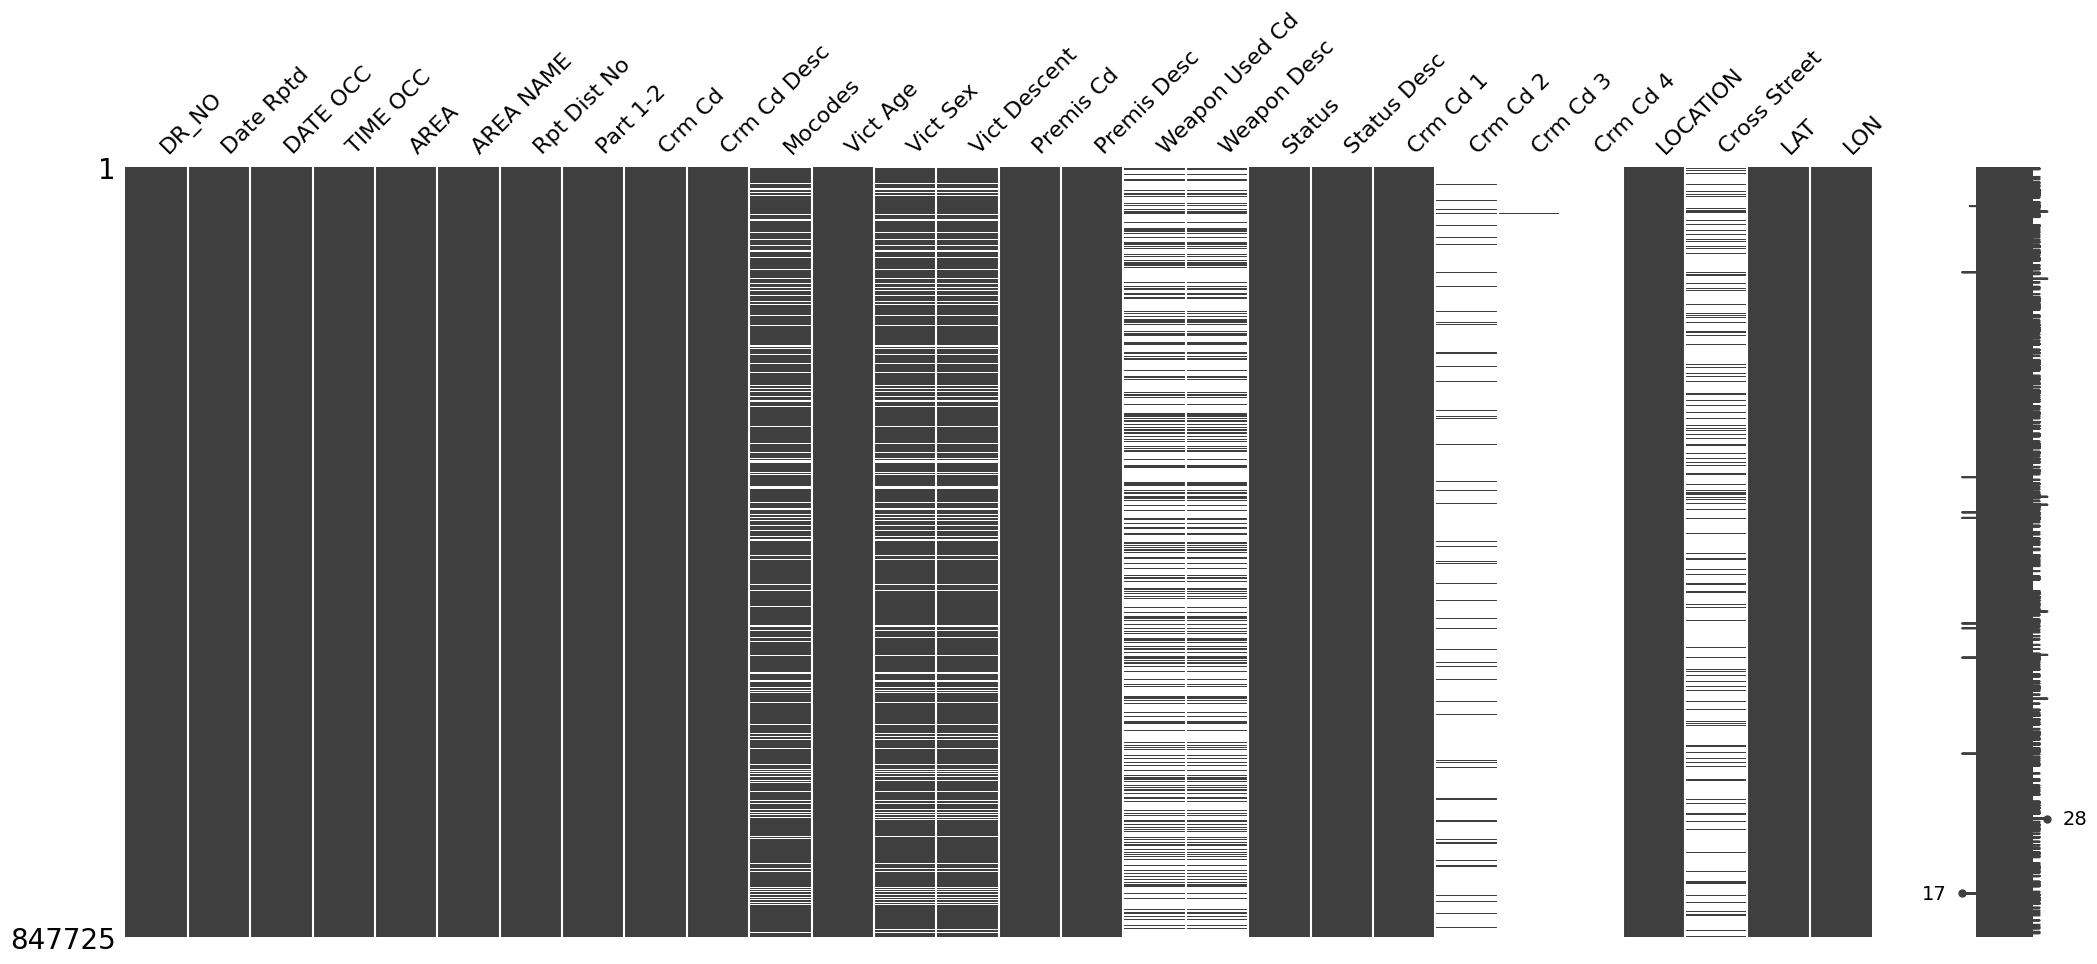

In [5]:
import missingno as msno
msno.matrix(df)
plt.show();

There are Several attributes containing substantially high number of null entry, but most of them are null for sensible reasons. Crm Cd 2, 3, 4 are associated crime codes, so they will be null when only one crime is charged, thats why they are null in most of the cases throughout the dataset. Similar reasons apply for the 2 weapon-related attributes, as many crimes do not involve weapons.

We will further determine the proportion of missing values, in this way we will get a clear picture of our data.

In [6]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df))*100
missing_data = pd.DataFrame({"Missing Values" : missing_values, 'Percentage' : missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])

                Missing Values  Percentage
Mocodes                 117642   13.877378
Vict Sex                111909   13.201097
Vict Descent            111917   13.202041
Premis Cd                   11    0.001298
Premis Desc                516    0.060869
Weapon Used Cd          552364   65.158395
Weapon Desc             552364   65.158395
Crm Cd 1                    11    0.001298
Crm Cd 2                785497   92.659412
Crm Cd 3                845623   99.752042
Crm Cd 4                847663   99.992686
Cross Street            712652   84.066413


In [7]:
# df['Cross Street'].value_counts()

In [8]:
# df.columns

In [9]:
# get general sense of data
df.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474


In [10]:
# these are not part of analysis
# df.drop(columns= ['Mocodes', 'Part 1-2', 'Status'], inplace= True)

In [11]:
# thershold = 0.8
# df = df.drop(thresh= len(df)*thershold, axis=1)
# df.isnull().sum()[df.isnull().sum()>0]

In [12]:
# Check statistics of numeric data
df[['Vict Age', 'TIME OCC', 'LAT', 'LON']].describe()

,Vict Age,TIME OCC,LAT,LON
count,847725.000000,847725.000000,847725.000000,847725.000000
mean,29.752342,1336.185485,33.982636,-118.038126
std,21.795718,653.732980,1.761630,6.107747
min,-3.000000,1.000000,0.000000,-118.667600
25%,5.000000,900.000000,34.014000,-118.429700
50%,31.000000,1415.000000,34.058400,-118.321500
75%,45.000000,1900.000000,34.163100,-118.273900
max,120.000000,2359.000000,34.334300,0.000000


Although victim's age is the only numeric data, I also summarized the column "TIME OCC" (time of occurrence), LAT, and LON as it is possible to identify "impossible" data.

Victim's age is showing some absurd behavior, there are victim who are -3 and 120 years old, which might be entry errors. We have to clean the data with suspicious victim's age.

I will check the distribution of the data to further ascertain to check the entries which might need our attention, and then we will dealth with the accordingly.

In [13]:
df['Vict Age'].value_counts().sort_index()

-3           1
-2          13
-1          60
 0      210315
 2         373
         ...  
 96         88
 97         63
 98         67
 99        310
 120         1
Name: Vict Age, Length: 103, dtype: int64

There are quite a few victims with the age of -3, -2, -1, or 120. I will remove these entries as they are likely to be inaccurate data. There are cases where the victim age is 0, which may refer to situations when age of the victim is not identified or the victim is not human.

In [14]:
df = df[df['Vict Age'].isin([-3, -2, -1, 120]) == False]

Parsed the column with dates into datetime format.

In [15]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

In [16]:
# checking for duplicate entries.
len(df[df.duplicated()])

0

In [17]:
# Average number of crimes per day:
duration = (df["DATE OCC"].max() - df["DATE OCC"].min()).days
print("There are {} crimes commited over {} days. On average, there are {} crimes each day."
          .format(len(df), duration, int(len(df)/duration)))

There are 847650 crimes commited over 1426 days. On average, there are 594 crimes each day.


In [18]:
# Number of unique crime categories registered
crime_freq = df['Crm Cd Desc'].value_counts()
print("There are {} unique crime categories registered in LA in a span of {} days." .format(crime_freq.size, duration))

There are 138 unique crime categories registered in LA in a span of 1426 days.


That's very vast categories of crimes that are happening in Los Angeles. It would be very interesting to see the distribution of most frequent crimes that take place in Los Angeles each day.

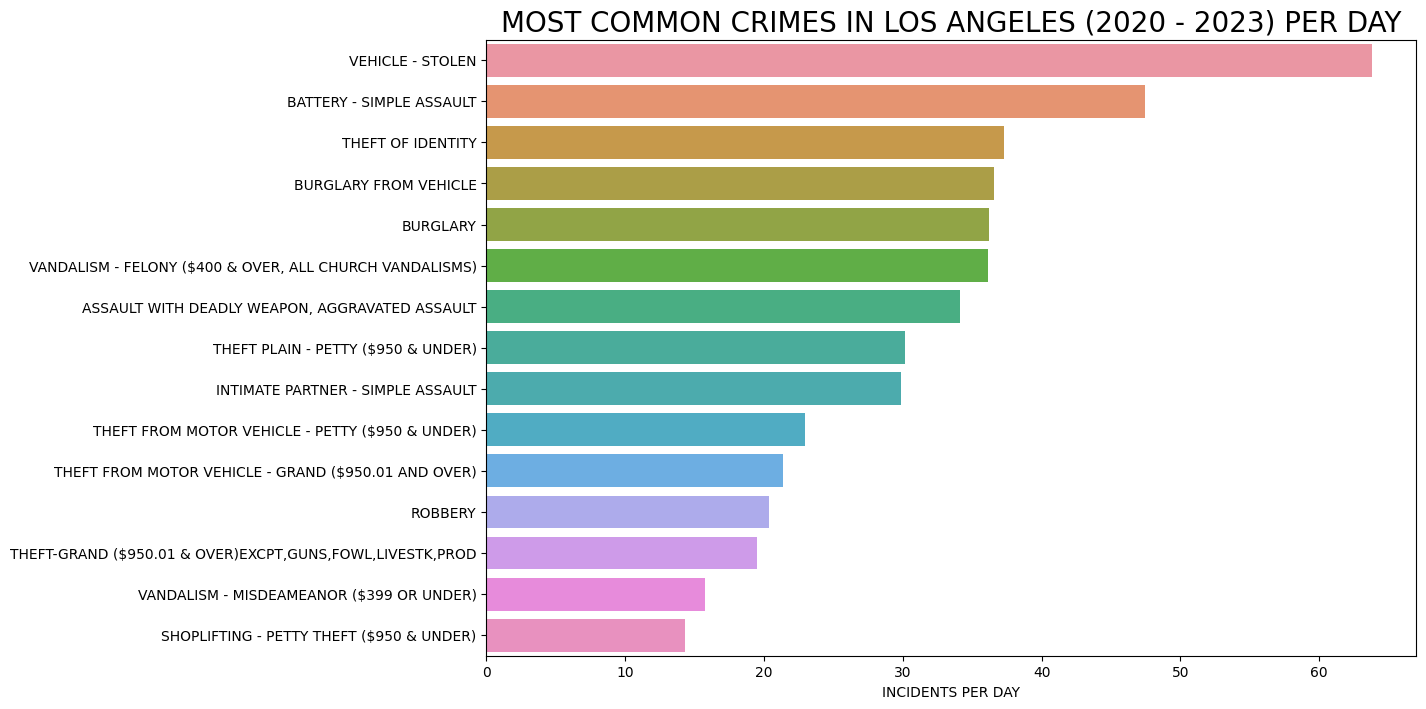

In [19]:
#crimes that takes place frequently
plt.rcParams["figure.figsize"] = (12, 8) # Set the default scale for the rest of the notebook
plt.rcParams['axes.titlesize'] = 20
sns.barplot(x = crime_freq.values[:15]/duration, y =crime_freq.index[:15])
plt.title("MOST COMMON CRIMES IN LOS ANGELES (2020 - 2023) PER DAY")
plt.xlabel("INCIDENTS PER DAY");

In Los Angeles, the analysis of the top 15 crimes reveals that Vehicle Theft is the most prevalent, followed by Simple Assault and Vandalism. Vandalism ranks 14th and Shoplifting ranks 15th respectively.

In [20]:
# Analzing the top crimes
crime_freq_df = crime_freq.to_frame().reset_index()
crime_freq_df.columns = ["Crime", "Count"]
crime_freq_df['Percentage'] = crime_freq_df.Count/crime_freq_df.Count.sum()*100
crime_freq_df['CumPerc'] = crime_freq_df["Percentage"].cumsum()
crime_freq_df[crime_freq_df.CumPerc < 70]

,Crime,Count,Percentage,CumPerc
0,VEHICLE - STOLEN,90981,10.733322,10.733322
1,BATTERY - SIMPLE ASSAULT,67652,7.981124,18.714446
2,THEFT OF IDENTITY,53126,6.267445,24.981891
3,BURGLARY FROM VEHICLE,52181,6.155961,31.137852
4,BURGLARY,51657,6.094143,37.231994
5,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51518,6.077744,43.309739
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",48690,5.744116,49.053855
7,THEFT PLAIN - PETTY ($950 & UNDER),42993,5.072023,54.125877
8,INTIMATE PARTNER - SIMPLE ASSAULT,42576,5.022828,59.148705
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),32691,3.856663,63.005368


Out of 138 unique crimes registered, top 11 make up more than 2/3 of all crimes happening in Los Angeles.

#### Frequency of criminal activities over time
Analyzing the frequency of criminal activities over time, I will delve deeper to determine whether the crime rates exhibit an increasing or decreasing trend.

In [21]:
# Weekly occurance
df['Weekly_Occ'] = pd.DatetimeIndex(df["DATE OCC"]).to_period('W').to_timestamp()

# Monthly occurance
df['Monthly_occ'] = pd.DatetimeIndex(df['DATE OCC']).to_period('M').to_timestamp()

Visualizng Weekly and Monthly trends over time.

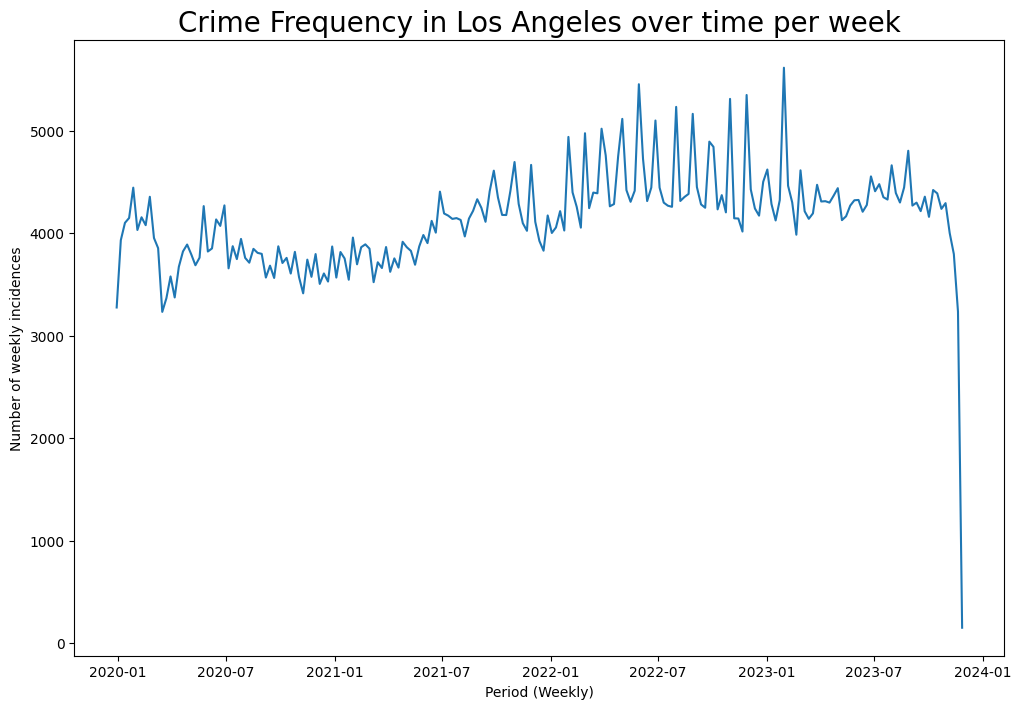

In [22]:
crime_occured = df.groupby("Weekly_Occ").count().reset_index()[["Weekly_Occ", "DR_NO"]]
plt.figure(figsize=(12,8))
sns.lineplot(x=crime_occured.Weekly_Occ, y=crime_occured.DR_NO)
plt.title("Crime Frequency in Los Angeles over time per week")
plt.ylabel("Number of weekly incidences")
plt.xlabel("Period (Weekly)");

The drop in the last week of 2023 is likely due to unupdated data (that is the week of Nov 27th, 2023. Compared to early 2020, there seem to be slightly more crimes happening in late 2022.

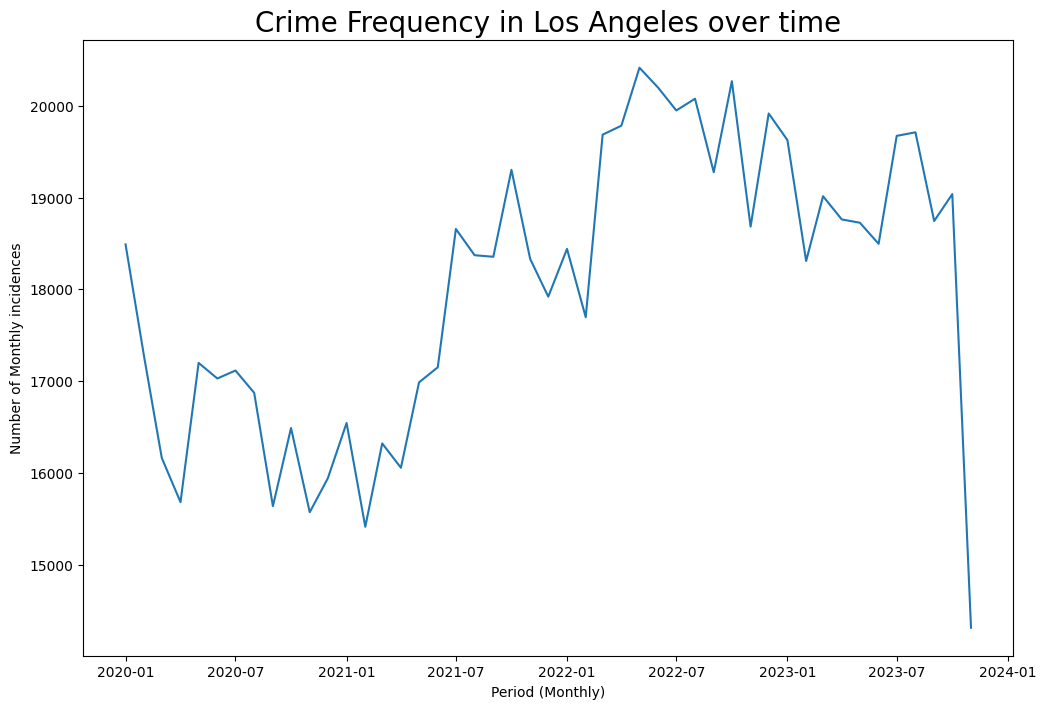

In [23]:
crime_occured_month = df.groupby("Monthly_occ").count().reset_index()[["Monthly_occ", "DR_NO"]]
plt.figure(figsize=(12,8))
sns.lineplot(x=crime_occured_month.Monthly_occ, y=crime_occured_month.DR_NO)
plt.title("Crime Frequency in Los Angeles over time")
plt.ylabel("Number of Monthly incidences")
plt.xlabel("Period (Monthly)");

Between early 2020 and early 2021, the crime rate remained relatively low, likely influenced by the impact of Covid-19. However, a notable surge occurred, peaking in mid-2022 and maintaining a consistent level throughout 2023.

####  Top Eight Crimes dataframe
Based on the top crimes calculated above, I pick the top 8 crimes as they account for almost 50% of all crimes committed and are suitable for visualization.

In [24]:
# top_crime_time = df[df['Crm Cd Desc'].isin(top_8_crimes)]

top_8_crimes = crime_freq_df.iloc[:8, 0]
top_8_crimes_df = df[df['Crm Cd Desc'].isin(top_8_crimes)]
top_8_crimes_df.sample()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Weekly_Occ,Monthly_occ
396416,211116250,2021-12-09,2021-12-08,2200,11,Northeast,1135,1,310,BURGLARY,1609 0344,0,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,4000 VERDUGO RD,NaN,34.1164,-118.2332,2021-12-06,2021-12-01


Plotting with Weekly Occurance.

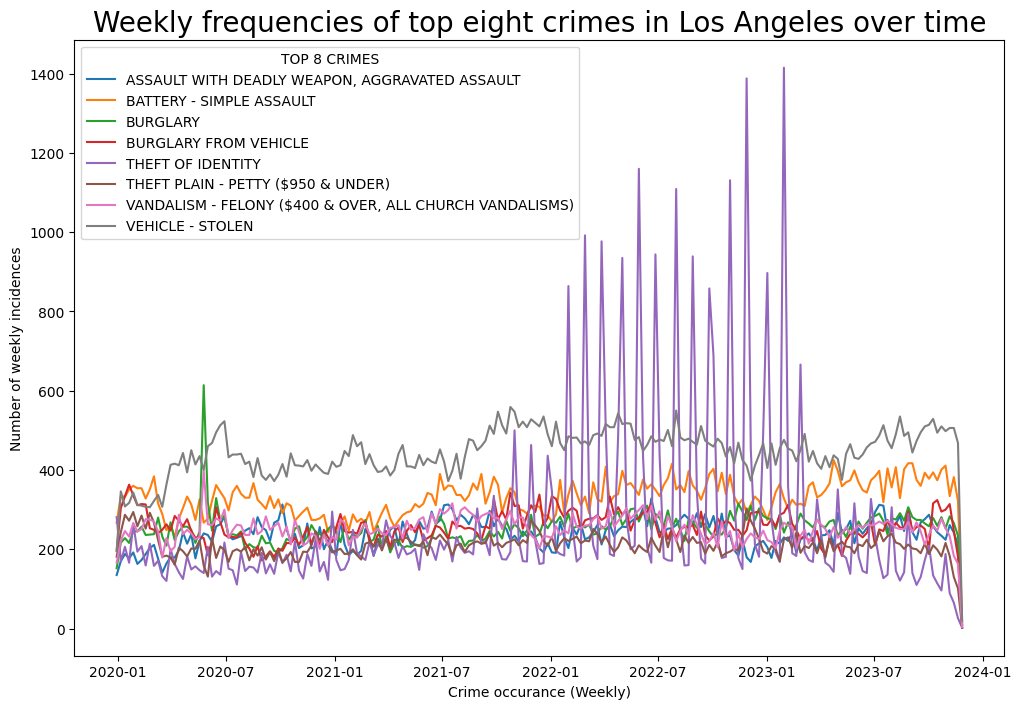

In [25]:
top_crime_df_weekly = top_8_crimes_df.groupby(["Weekly_Occ", "Crm Cd Desc"]).count().reset_index()[["Weekly_Occ", 
                                                                                                  "Crm Cd Desc", "DR_NO"]]

plt.figure(figsize=(12,8))
sns.lineplot(data=top_crime_df_weekly, x="Weekly_Occ", y = "DR_NO", hue = 'Crm Cd Desc')
plt.title("Weekly frequencies of top eight crimes in Los Angeles over time")
plt.ylabel("Number of weekly incidences")
plt.xlabel("Crime occurance (Weekly)")
plt.legend(title = "TOP 8 CRIMES");

Checking for monthly trends.

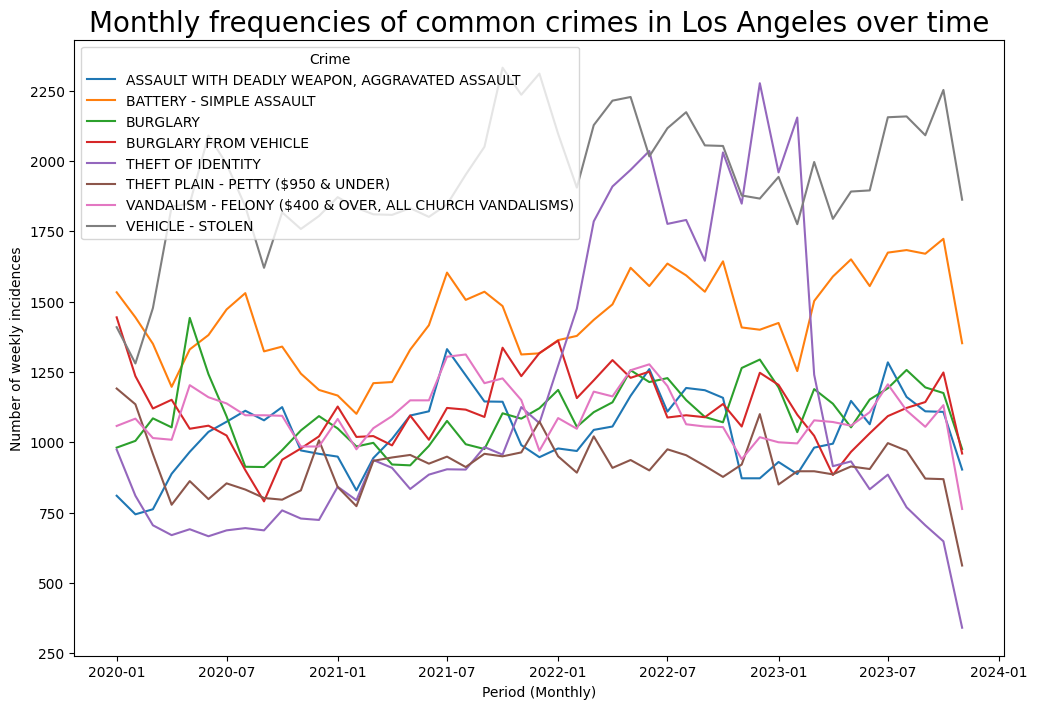

In [26]:
top_crime_df_monthly = top_8_crimes_df.groupby(["Monthly_occ", "Crm Cd Desc"]).count().reset_index()[["Monthly_occ", "Crm Cd Desc", "DR_NO"]]

plt.figure(figsize=(12,8))
sns.lineplot(data=top_crime_df_monthly, x="Monthly_occ", y = "DR_NO", hue = 'Crm Cd Desc')
plt.title("Monthly frequencies of common crimes in Los Angeles over time")
plt.ylabel("Number of weekly incidences")
plt.xlabel("Period (Monthly)")
plt.legend(title = "Crime");

Stealing vehicle remains the most common crime of all time. However, there is a steep increase of identity theft within the last year, with a striking fluctuating pattern (one possibility is that the peaks co-occur with the payment week). This is a sign that more warnings regarding protecting personal information should be given out to LA residents.

#### Which time of the day crimes mostly happen?

C:\Users\hp\AppData\Local\Temp\ipykernel_104048\2204365547.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  crime_hour_table = crime_hour.pivot("crime_time", 'Monthly_occ', 'DR_NO')


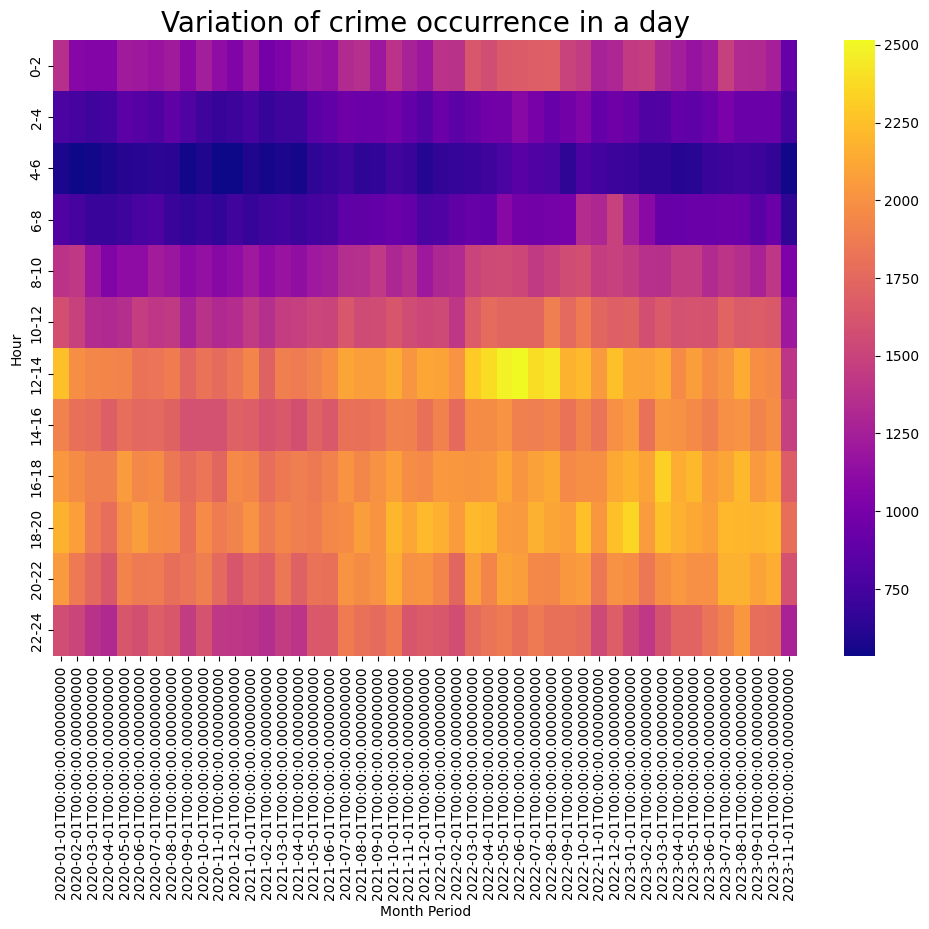

In [27]:
df['crime_time'] = pd.cut(x = df['TIME OCC'], bins = [0, 159, 359, 559, 759, 959, 1159, 1359, 1559, 1759, 1959, 2159, 2359],
          labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-14', '14-16', '16-18','18-20','20-22','22-24'])
crime_hour = df.groupby(['crime_time', 'Monthly_occ'])['DR_NO'].size().reset_index()
crime_hour_table = crime_hour.pivot("crime_time", 'Monthly_occ', 'DR_NO')
sns.heatmap(crime_hour_table, cmap = "plasma")
plt.title("Variation of crime occurrence in a day")
# plt.xticks(np.arange(0.5, 40, 1),labels = crime_hour_table.columns.to_period('M'))
plt.xlabel("Month Period")
plt.ylabel("Hour");

In [28]:
# df['crime_time'].value_counts()


### How long do people wait before reporting the crime

In [29]:
df['delay_reported'] = (df['Date Rptd'] - df['DATE OCC']).dt.days

In [30]:
df['delay_cat'] = pd.cut(x = df['delay_reported'], bins=[-1, 0, 1, 2, 7, 30, 365, np.inf],
                             labels=["Same day","1 day","2 days",'3-7 days','8-30 days','1 month-1 year','More than 1 year'])

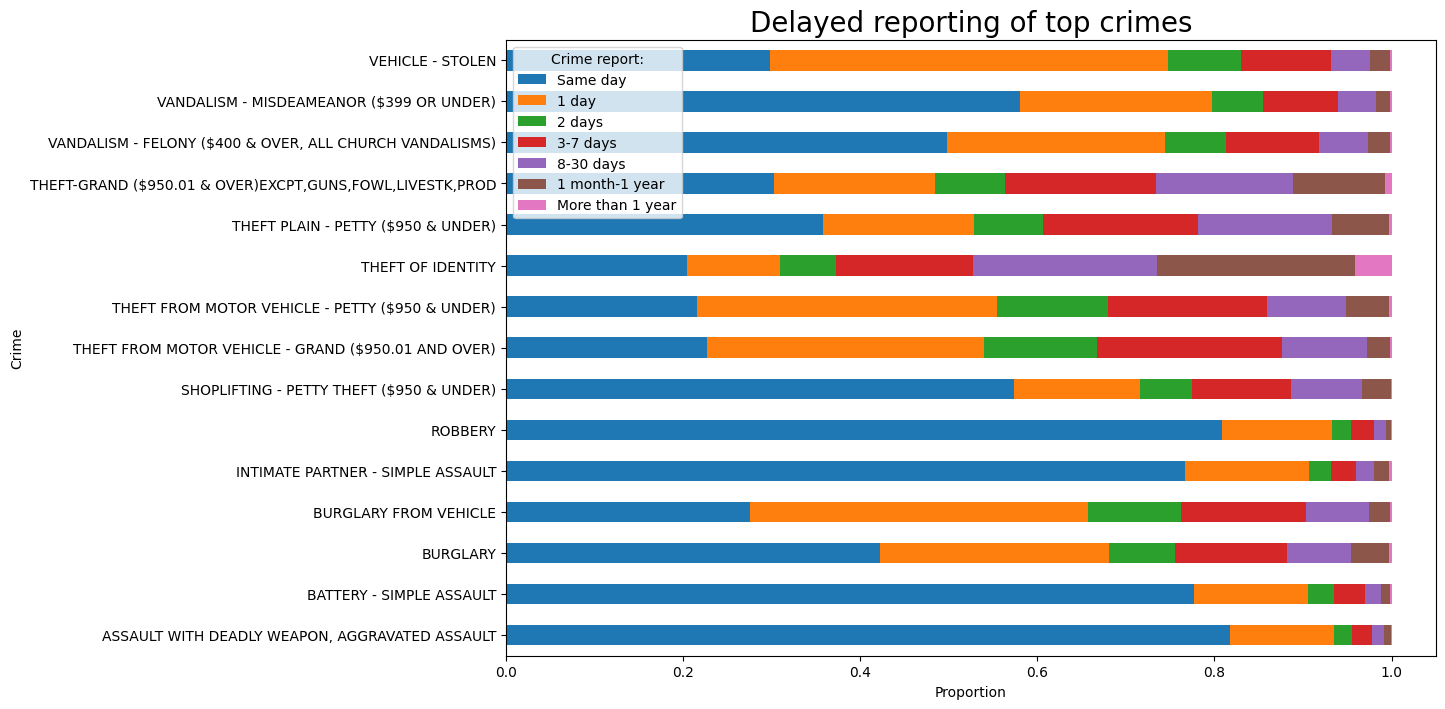

In [31]:
top_crime = crime_freq_df.iloc[:15,0]
top_crime_delay = df[df['Crm Cd Desc'].isin(top_crime)].groupby("Crm Cd Desc")['delay_cat'].value_counts(normalize=True).unstack()

top_crime_delay.plot.barh(stacked = True)
plt.title('Delayed reporting of top crimes')
plt.ylabel('Crime')
plt.xlabel('Proportion')
# plt.yticks(rotation = 45)
plt.legend(title = "Crime report:");

Most of the common crimes are reported within one day of the incident. Assault, vandalism, robbery, and stolen vehicles are reported very timely. However, burglary and theft are generally reported later, which may reflect the nature of those crimes that the victims may not notice them right away. Notably, theft of identity - the crime rising in popularity - also has the longest delay of report.

# Crime Location
In which region do the crimes happen more often?



In [32]:
# import folium
# from folium.plugins import HeatMap

In [33]:
# # Exclude entries without location information
# valid_lat_lon = df[(df['LAT'] != 0) & (df['LON'] != 0)]
# # Take a sample of 0.1% all entries
# sample_df = valid_lat_lon.sample(int(0.001 * len(valid_lat_lon)))
# lat_lon_pairs = list(zip(list(sample_df.LAT), list(sample_df.LON)))

In [34]:
# map_la = folium.Map(location = [34.0522, -118.2437], zoom_start = 9.5)
# HeatMap(lat_lon_pairs).add_to(map_la)
# map_la

From the leaflet map, we can see that crimes are spread almost all over the city.

The city is divided into 21 areas. We can count the number of incidences in each area.

In [35]:
import plotly.express as px

In [36]:
# valid_lat_lon['area_count'] = valid_lat_lon.groupby('AREA')['DR_NO'].transform('count')
# fig = px.scatter(data_frame = valid_lat_lon.sample(int(0.01 * len(valid_lat_lon))), 
#                  x='LON', y='LAT', color_continuous_scale = "viridis", 
#                  color = "area_count", hover_data = ["AREA NAME"], 
#                  labels={"LAT":"Latitude", "LON":"Longitude", "area_count":"Incidences"}, 
#                  title = "Areas and their number of crime incidents")
# fig.update_layout(width = 600, height = 700, title={'x': 0.5, 'xanchor': 'center'})
# fig.update_yaxes(scaleanchor="x", scaleratio=1,)
# fig.update_traces(marker=dict(size=6,
#                               line=dict(width=0.5,
#                                         color='aliceblue')),
#                   selector=dict(mode='markers'))
# fig.show()

### Q7: In which buildings/vehicles do crime often happen?

In [37]:
from wordcloud import WordCloud

In [38]:
premises_occured = df['Premis Desc'].value_counts().head(200)
# Create a dictionary
premises_dict = {}
for i in range(len(premises_occured)):
    a = premises_occured.index[i]
    x = premises_occured.values[i]
    premises_dict[a] = x

In [39]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'Weekly_Occ', 'Monthly_occ', 'crime_time', 'delay_reported',
       'delay_cat'],
      dtype='object')

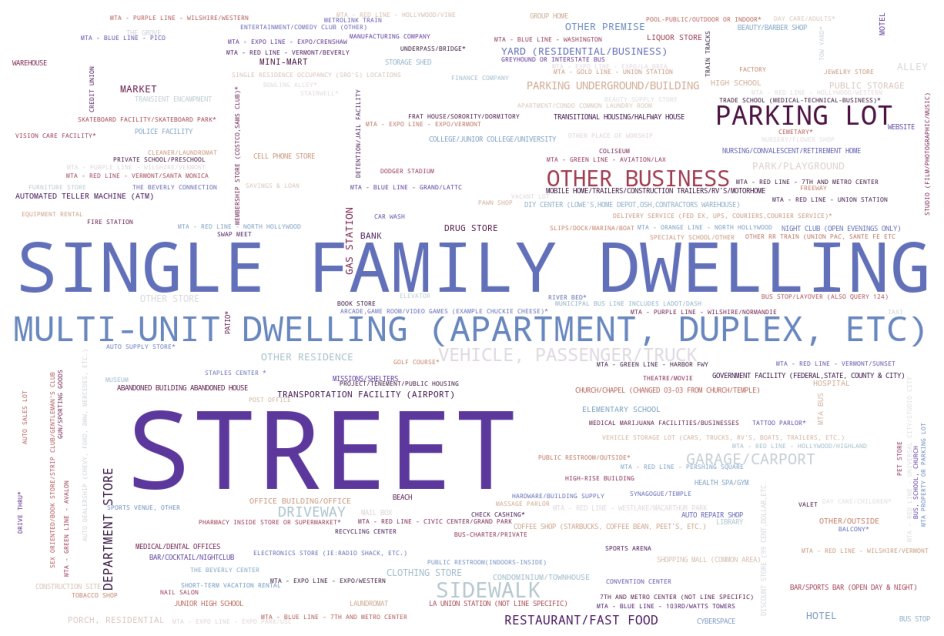

In [40]:
wordcloud = WordCloud(width=1200,
        height=800,
        random_state=15,
        background_color="white",
        colormap="twilight_shifted",
        collocations=False)

wordcloud.generate_from_frequencies(premises_dict)
# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Crimes can happen everywhere, but mostly occures in public spaces like the street, sidewalk, parking lot and more private places like residential buildings like multi-unit or single family dwellings.

# Victims' Characteristics

## What are most vulnerable groups that are prone to crime.

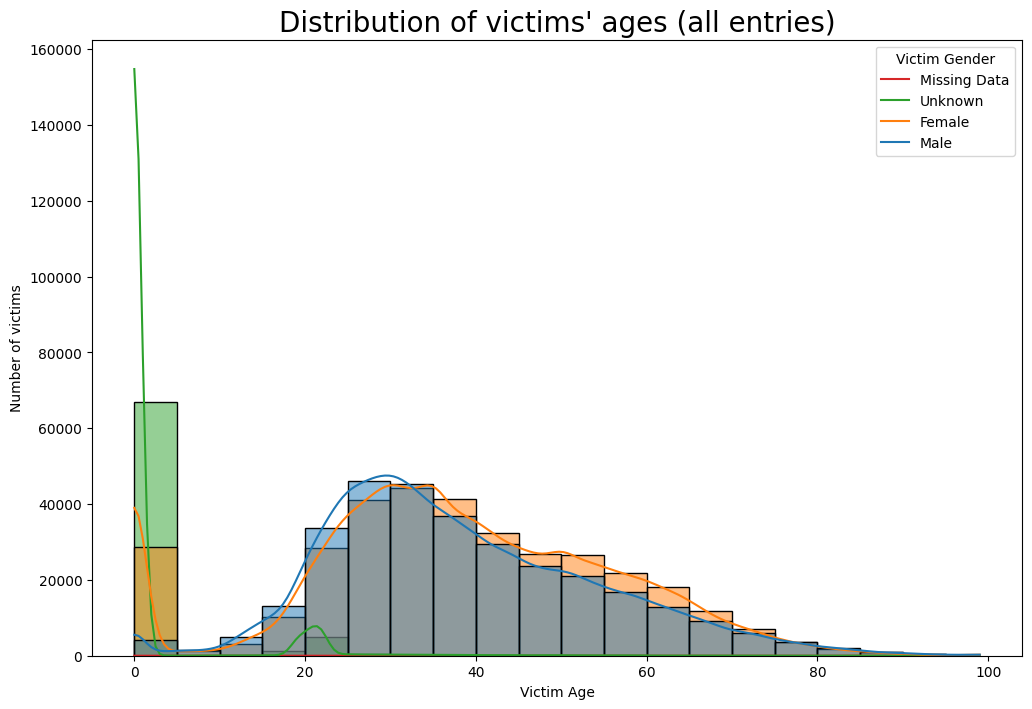

In [41]:
plt.figure(figsize= (12, 8))
sns.histplot(data= df, x ='Vict Age', hue ='Vict Sex', bins = np.arange(0, 100, 5), kde= True)
plt.title("Distribution of victims' ages (all entries)")
plt.xlabel("Victim Age")
plt.ylabel('Number of victims')
plt.legend(['Missing Data', 'Unknown', 'Female', 'Male'], title = "Victim Gender");

Looking at the histogram, it appears that most the victim are 0 year old. As I speculated earlier, it is possible that 0 is filled when the victim doesn't give his/her age to the record. It is supported by the high notion of unknown gender (probably the victim remains anonymous, or the victim is not human - such as vandalism), and a higher number of females than males (women are is less likely to share their age than men in general). Thus, I exclude all records with age equal 0 from the histogram.

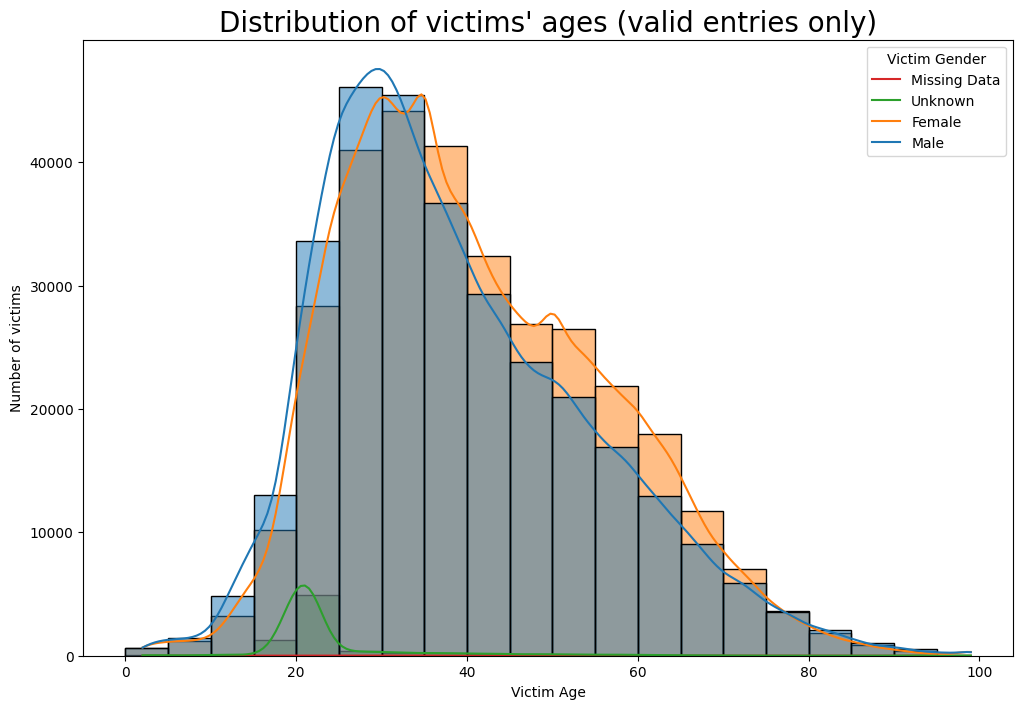

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(data = df[df['Vict Age'] != 0], x = 'Vict Age', hue = 'Vict Sex', bins = np.arange(0,100,5), kde = True)
plt.title("Distribution of victims' ages (valid entries only)")
plt.xlabel("Victim Age")
plt.ylabel('Number of victims')
plt.legend(['Missing Data', 'Unknown', 'Female', 'Male'], title = "Victim Gender");

After exclusion, the histogram shows few discrimination between men and women. If we assume that the gender ratio is about 1 in this city, both genders are equally likely to be harmed.

Most victims are between 20 and 40 years old, but it may not accurately reflect the vulnerability as there can simply be more people of this age in the city. If we assume a stable population dynamic in this city (the difference between age groups aren't very large), this data may point towards adult as the main victims. However, we should also consider that crimes involving children and elders tend to be underreported.

### Which races are targeted more?

From the information of victim descent, I group them into 7 ethnic groups (Hispanic, Caucasian, Black, Asian, Pacific Islander, Other, and Unknown)

In [43]:
df['Ethnicity'] = df['Vict Descent'].transform(lambda x:
                                                 "Hispanic" if x=="H" 
                                else "Caucasian" if x=="W" 
                                else "Black" if x == "B" 
                                else "Unknown" if x=="X" 
                                else "Other" if x=="O" 
                                else "Pacific Islander" if x in ["G", "I", "P", "S", "U"] 
                                else "Asian")

<AxesSubplot: ylabel='Ethnicity'>

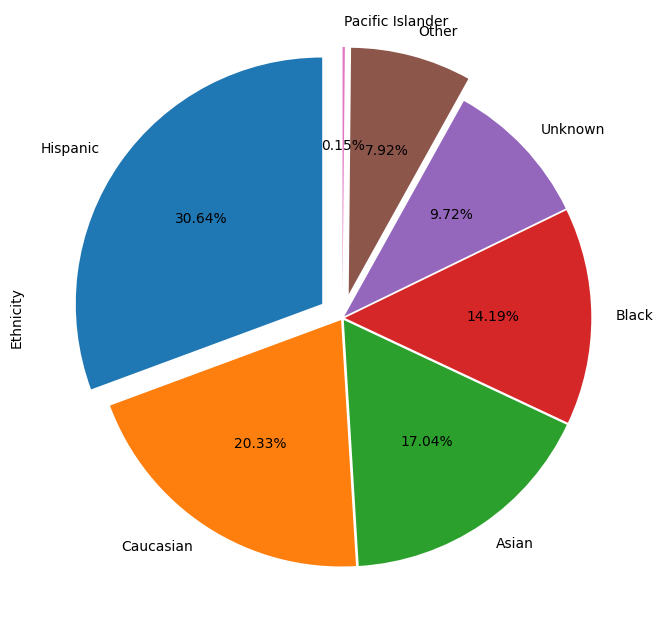

In [44]:
df['Ethnicity'].value_counts().plot(kind= 'pie', autopct = "%.2f%%", startangle=90, explode=[0.1,0.01,0.01,0.01,0.01,0.1,0.1])

From the number of victims, we may conclude that Hispanic people are being targeted the most, followed by Caucasian, then Asians, then Black people. However, to check for vulnerability, we must consider the distribution of races in the city, and it is impossible to conclude that within the given data.

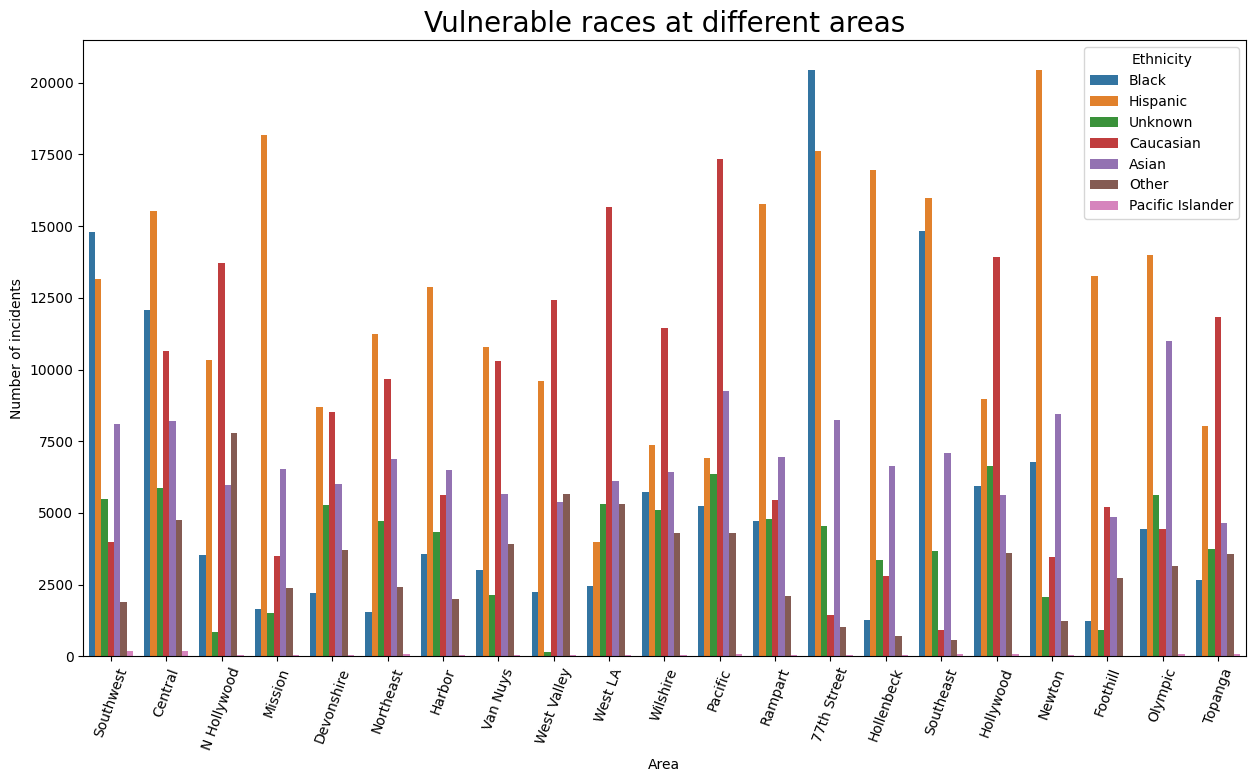

In [45]:
plt.figure(figsize= (15, 8))
sns.countplot(data=df, x = 'AREA NAME', hue = 'Ethnicity')
plt.xticks(rotation=70)
plt.title("Vulnerable races at different areas")
plt.ylabel("Number of incidents")
plt.xlabel("Area");